# MODUL I 

#### Mengimport Library

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

Script "import matplotlib.pyplot as plt" digunakan untuk mengimport library matplotlib.pyplot yang digunakan untuk membuat plot grafik dan visualisasi data

Script "import numpy as np" digunakan untuk mengimport library Numpy sebagai alat bantu matematika yang sering digunakan dalam pengolahan citra

Script "import cv2 as cv" digunakan untuk mengimport library OpenCV yang digunakan untuk pengolahan citra dan video

#### Memasukkan Gambar

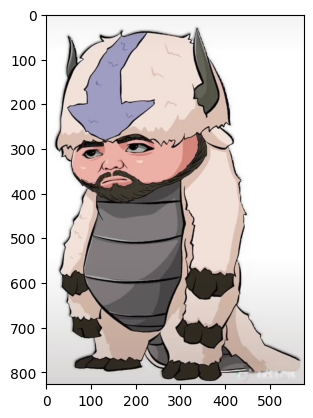

In [15]:
image=plt.imread("images/appa-regen.jpg")
plt.imshow(image)

Script tersebut digunakan untuk membaca citra "aang.jpg" menggunakan fungsi imread() dari library matplotlib.image dan menampilkannya menggunakan fungsi imshow() dari matplotlib.pyplot.

imread() digunakan untuk membaca citra dari file dan mengembalikan nilai piksel citra dalam bentuk array numpy. Sedangkan imshow() digunakan untuk menampilkan citra dalam bentuk gambar.

#### Membuat Jadi Grayscale

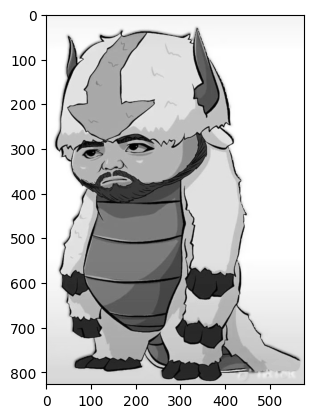

In [16]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Script diatas digunakan untuk mengubah citra berwarna RGB menjadi citra grayscale. cvtColor() adalah fungsi dari pustaka cv2 yang digunakan untuk mengubah format warna citra. Dalam kode tersebut, citra "img" diubah menjadi citra grayscale menggunakan mode warna BGR2GRAY.

Setelah citra diubah, citra grayscale disimpan dalam variabel "gray_image".

Script plt.imshow (gray_image, cmap='gray') digunakan untuk menampilkan gambar grayscale dengan menggunakan fungsi imshow() dari library matplotlib.pyplot.

Di sini, gray_img adalah array gambar grayscale yang ingin ditampilkan. Parameter cmap disetel menjadi 'gray', yang menunjukkan penggunaan colormap grayscale untuk menampilkan gambar. Secara default, imshow() akan menggunakan colormap 'viridis' jika tidak ada colormap yang disebutkan.

#### Clipping

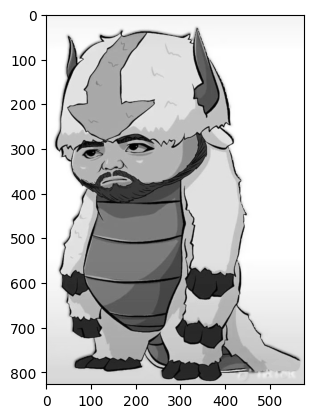

In [17]:
gray_image.shape
width = gray_image.shape[1]
height = gray_image.shape[0]
for i in range(height):
    for j in range(width):
        if gray_image[i][j] < 0:
            gray_image[i][j] = 0
        elif gray_image[i][j] > 255:
            gray_image[i][j] = 255
gray_image
plt.imshow(gray_image, cmap = 'gray')

Script diatas digunakan untuk clipping yang dimana jika setiap index dari gambar tersebut bernilai lebih dari 255 maka akan dijadikan 255, dan jika kurang dari 0 maka akan dijadikan 0.

#### Menghitung Intensitas

In [18]:
sumGray = np.zeros(256)
for i in range(height):
    for j in range(width):
        val = gray_image[i][j]
        sumGray[val] += 1

Script di atas digunakan untuk menghitung distribusi intensitas piksel dalam gambar grayscale gray_image menggunakan array sumGray yang telah dibuat sebelumnya.

Pertama-tama, script akan membuat sebuah array sumGray dengan ukuran 255 yang diisi dengan nilai nol, dimana setiap elemen array akan merepresentasikan jumlah kemunculan nilai pixel dalam gambar.

Setelah itu, script akan melakukan iterasi sebanyak tinggi dan lebar gambar (menggunakan for loop untuk masing-masing koordinat piksel), dan pada setiap iterasi, script akan mengambil nilai piksel pada koordinat (i,j) dalam gambar grayscale dan menambahkan satu ke elemen array sumGray yang sesuai dengan nilai piksel tersebut. Dengan cara ini, array sumGray akan merekam jumlah kemunculan setiap nilai piksel dalam gambar.

Dalam pengolahan gambar, jumlah kemunculan setiap nilai piksel dapat menjadi informasi yang berguna untuk menghitung histogram gambar, menentukan batas thresholding, atau melakukan normalisasi gambar, dan lain-lain. Oleh karena itu, script ini dapat berguna dalam proses pengolahan gambar.

#### Normalisasi dan Histogram

[  987.62756953  1650.68923821  1046.82950423   871.31318017
   715.29866989   642.1668682    559.28415961   520.28053204
   443.6662636    424.86094317   394.21523579   381.6783555
   369.83796856   345.46070133   314.1185006    330.83434099
   307.85006046   305.76058041   290.43772672   298.79564692
   264.66747279   300.18863362   282.07980653   286.95525998
   293.22370012   297.40266022   302.97460701   328.74486094
   300.88512696   277.20435308   312.72551391   291.83071342
   313.42200726   323.8694075    302.97460701   368.44498186
   429.03990326   527.94195889   727.13905683  1701.53325272
  2813.13663845  2534.53929867  2175.14873035  1112.29987908
   766.83917775   550.22974607   406.75211608   369.83796856
   317.60096735   269.54292624   266.06045949   292.52720677
   297.40266022   286.95525998   379.58887545   478.49093108
   647.73881499   463.86457074   383.76783555   296.00967352
   280.68681983   251.43409915   240.29020556   250.7376058
   252.82708585   274.4183

<BarContainer object of 256 artists>

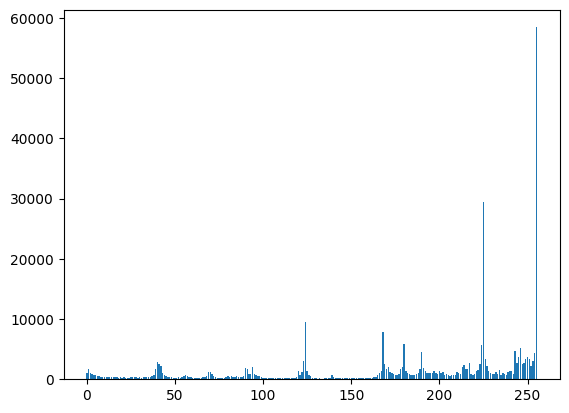

In [19]:
normal = sumGray / height * width
print(normal)
plt.bar([i for i in range (256)], normal)

Script "normal = sumGray / height * width" dilakukan untuk normalisasi dengan membagi hasil sumGray dengan hasil kali antara lebar dan tinggi.

Script akan menggunakan fungsi plt.bar() dari library matplotlib untuk membuat sebuah histogram dengan menggunakan grayvalue sebagai sumbu x dan sumGray (yang merepresentasikan jumlah kemunculan setiap nilai piksel dalam gambar) sebagai sumbu y.

#### Kernel

In [20]:
kernel = np.array ([
    [1,2,-1,1], 
    [0,2,1,2],
    [2,1,1,0],
    [1,0,-1,0]
])

Berfungsi untuk memasukkan kernel dalam bentuk array

#### Konvolusi

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


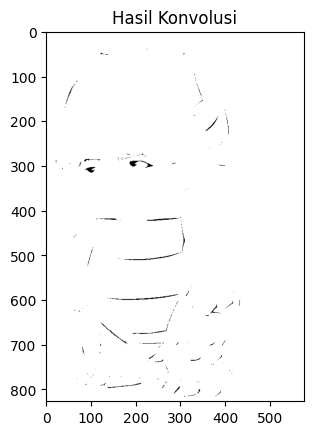

In [21]:
imgRows, imgCols = gray_image.shape
kernelRows, kernelCols = kernel.shape

paddingSize = int((kernelRows - 1) / 2)
paddingImg = np.pad(gray_image, pad_width=((paddingSize, paddingSize+1), (paddingSize, paddingSize+1)), mode='constant')
zeroPadd = np.zeros((imgRows, imgCols))

for i in range(zeroPadd.shape[0]):
    for j in range(zeroPadd.shape[1]):
        zeroPadd[i][j] = np.round((paddingImg[i:i + kernelRows, j:j + kernelCols] * kernel).sum())

for i in range(height):
    for j in range(width):
        if zeroPadd[i][j] > 127:
            zeroPadd[i][j] = 255
        else:
            zeroPadd[i][j] = 0

print (zeroPadd)
plt.imshow(zeroPadd, cmap='gray')
plt.title("Hasil Konvolusi")
plt.show()

Berfungsi untuk mendapatkan ukuran dimensi dari citra gray_image yang akan diproses dan disimpan pada variabel imgRows dan imgCols.

Berfungsi untuk mendapatkan ukuran dimensi dari citra kernel yang akan diproses dan disimpan pada variabel kernelRows dan kernelCols.

Berfungsi untuk membuat array kosong yang akan menyimpan hasil perhitungan konvolusi tanpa padding dengan mengurangi ukuran citra dengan kernel lalu ditambah 1 dan disimpan pada variabel noPadd.

Berfungsi untuk melakukan iterasi pada setiap baris (i) dan kolom (j) dalam citra sehingga dapat melakukan operasi pada setiap piksel dalam citra.

Berfungsi Melakukan konvolusi pada area gambar yang sesuai dengan ukuran kernel pada setiap iterasi menggunakan fungsi sum() dan disimpan di array noPadd pada lokasi yang sesuai dengan indeks i dan j.

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


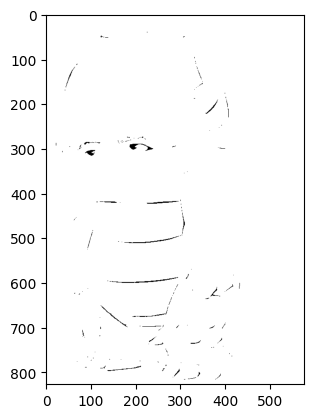

In [22]:
min = np.min(zeroPadd)
max = np.max(zeroPadd)
clipping = np.round((zeroPadd - min) / (max - min))
print(clipping)
plt.imshow(clipping, cmap='gray')

Script diatas ini berfungsi untuk mencari nilai minimum dan maksimum dari seluruh piksel setelah di konvolusi dan mencari nilai array hasil dari clipping

#### Rotasi

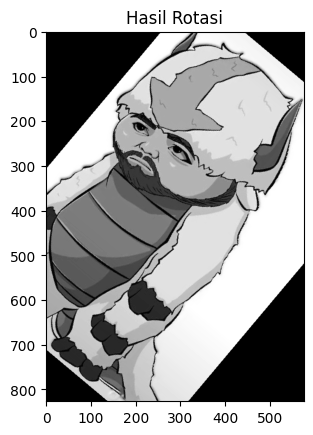

In [23]:
rotasi = np.zeros((height, width)).astype(int)
sudut = np.deg2rad(40)
sin = np.sin(sudut)
cos = np.cos(sudut)
centerx = height/2 
centery = width/2
for i in range (height): 
    for j in range (width):
        x = int ((i - centerx) * cos - (j - centery) * sin + centerx) 
        y = int ((i - centerx) * sin + (j - centery) * cos + centery) 
        if 0 <= x < height and 0 <= y < width: 
            rotasi[i][j] = gray_image[x][y]
plt.title("Hasil Rotasi")
plt.imshow(rotasi, cmap='gray')

Code di atas digunakan untuk mendeklarasikan variabel "sudut" yang menyimpan nilai besaran sudut nantinya terhadap citra yang akan dirotasi yakni sebesar 40 derajat. Kemudian didefinisikan variabel "sin" dan "cos" yang menyimpan nilai sinus dan cosinus dari variabel sudut yang didefinisikan.

Code di atas digunakan untuk mendefinisikan variabel "centerx" dan "centery" yang merepresentasikan nilai pixel pusat dari citra yang diinputkan berdasarkan nilai tinggi dan lebar citra yang dibagi 2.

Code merupakan barisan perintah untuk melakukan rotasi citra. Disini terdapat nested loop untuk mengakses semua pixel citra grayscale yang diinputkan, kemudian didefinisikan variabel x dan y yang menyimpan nilai terbaru dari pixel setelah dilakukan rotasi. Kedua nilai dari variabel ini didapatkan dari formula (x’ = x cos() – y sin()) dan (y’ = x sin() + y cos()). Disini juga terdapat statement kondisi jikan nilai x lebih besar dari 0 dan lebih kecil dari lebar citra serta nilai y kebih besar dari 0 dan lebih kecil dari lebar citra, sehingga didapat hasil rotasi dari citra yang diinputkan.

#### Translasi

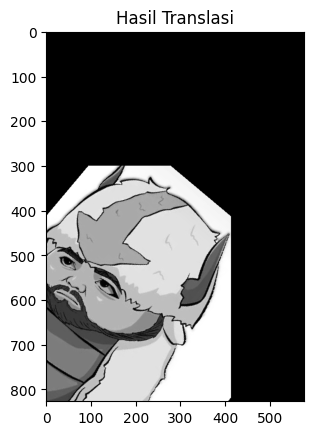

In [24]:
translasi = np.zeros((height, width)).astype(int)
for i in range (height) :
    for j in range (width) :
        if i-300 > 0 and j + 163 < width :
            translasi[i][j] = rotasi[i-300][j+163]
plt.title("Hasil Translasi")
plt.imshow(translasi, cmap="gray")

fungsi diatas memindahkan setiap piksel citra sesuai dengan jarak yang diinginkan. Proses ini dilakukan pada setiap piksel dengan menggunakan nilai pada baris dan kolom grayimage untuk menentukan posisi baru piksel pada citra hasil translasi.

#### Pencerminan

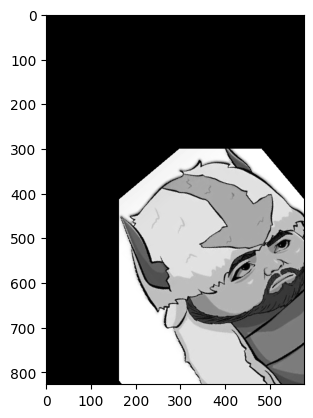

In [25]:
mirror = np.zeros((height, width)).astype(int)
for i in range(height):
    for j in range(width):
        mirror[i,j] = translasi[i, width - j - 1]
plt.imshow(mirror, cmap='gray')        

Code di atas merupakan nested loop yang digunakan untuk mengakses semua pixel citra grayscale yang diinputkan sehingga citra dapat dicerminkan, di mana untuk masing-masing pixel dari citra grayscale yang sudah dicerminkan terhadap sumbu x akan disimpan dalam variabel "mirror" menggunakan formula (B[x][y] = A[N – x][y]).

#### Dilatasi

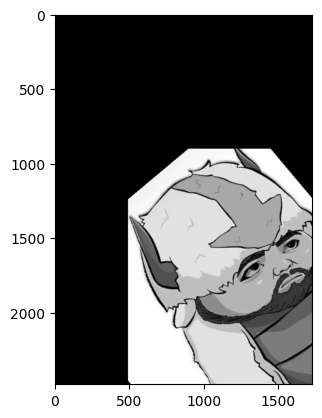

In [26]:
dilatasi = np.zeros((height*3, width*3)).astype(int)

for i in range(height*3):
	for j in range(width*3):
		dilatasi[i,j] = mirror[int(i/3),int(j/3)]

plt.imshow(dilatasi, cmap='gray')

Code di atas merupakan nested loop yang digunakan untuk mengakses semua pixel citra grayscale yang diinputkan sehingga citra dapat didilatasi, di mana masing-masing pixel dari citra grayscale yang sudah didilatasi akan disimpan dalam variabel "dilatasi". Setiap pixel dari citranya akan diberikan proses penambahan pixel berdasarkan skalanya dan akan dikalkulasikan berdasarkan tinggi dan lebar citra yang diinputkan.